# Milestone 1 : Cleaning and Visualization

Name and Id  = Mohamed Bassem (2003731)                                                
Name and Id  = Mina Ehab (2005830)


In [402]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [403]:
df = pd.read_csv('data.csv')

# 1- Data Understanding

In [404]:
# Show first 10 rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
7,7,alfa-romeo,Alfa Romeo 164,black,07/1996,1996,5500,132,179,Manual,Petrol,"13,4 l/100 km",320 g/km,168000.0,(3.0) V6 Super
8,8,alfa-romeo,Alfa Romeo Spider,black,07/1996,1996,8990,141,192,Manual,Petrol,11 l/100 km,265 g/km,168600.0,|HU:neu|Klimaanlage|Youngtimer|
9,9,alfa-romeo,Alfa Romeo Spider,black,01/1996,1996,6976,110,150,Manual,Petrol,"9,2 l/100 km",220 g/km,99000.0,2.0 T.Spark L *Klima *2.Hand *Zahnriemen


In [405]:
# information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250

In [406]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (251079, 15)


In [407]:
# null count
null_values = df.isnull().sum()
null_values

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

In [408]:
# total number of cells
total_cells = np.product(df.shape)
total_missing = null_values.sum()
total_missing
print(f'total missing data: {total_missing/total_cells * 100}%')

total missing data: 0.7290932336037661%


General Visualization from the Dataset

This Histogram plot the frequency of car Brands

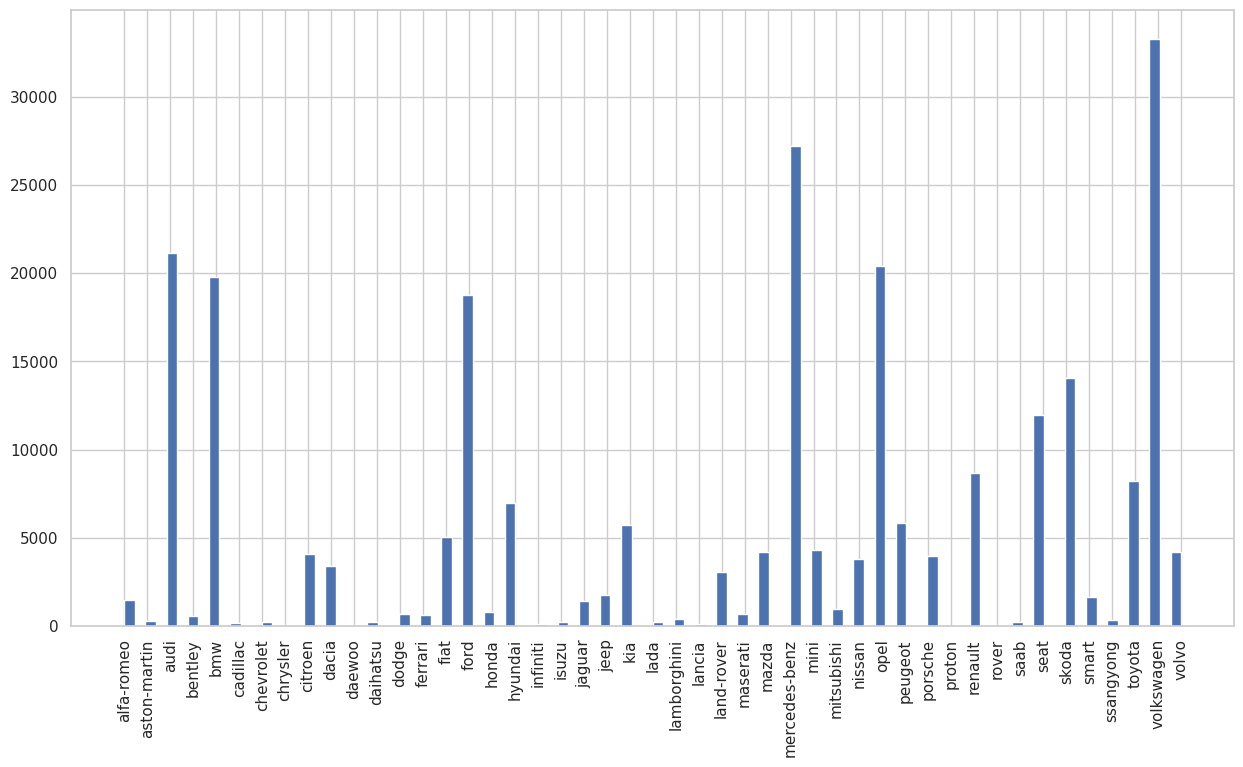

In [409]:
df['brand'].hist(bins=100,figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

This bar plot showes the frequency of colors in the dataset

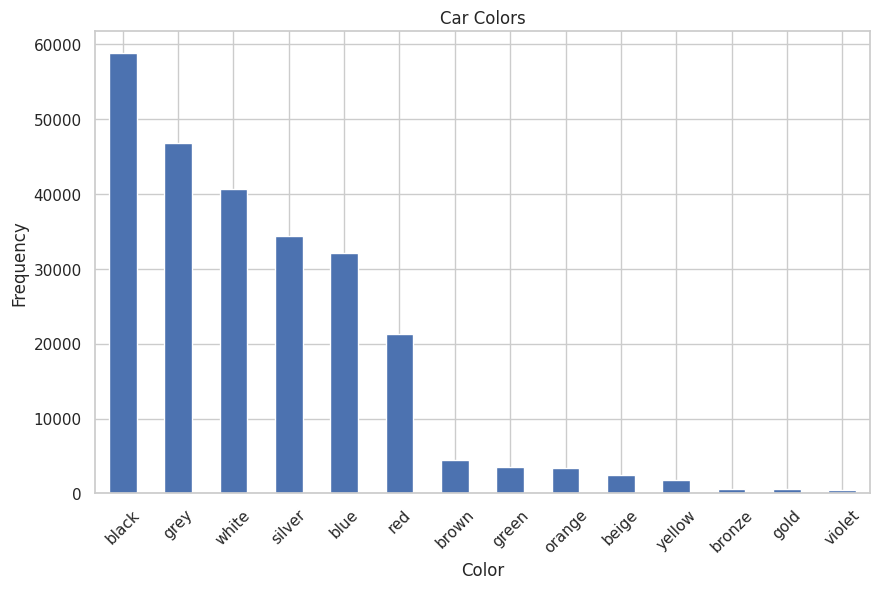

In [410]:
# Count the occurrences of each color
color_counts = df['color'].value_counts()

# Create a bar plot of color frequencies
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar')
plt.title('Car Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 2- Research Question

1- The effect of power and fuel type on fuel consumption.                       
2- the effect of power and transmission type on price.                           
3- what is relationship between brand and milage and year ?                                                          
4- what is relationship between brand and milage and price ?

# 3- Data cleaning

Filitering year column and removing the irrelevent values this filiter is made on the assumption that the dataset owner saud in the csv description on kaggle that the data set is from 1995 to 2023.

In [411]:
print('Values in the year column before filtering:')
print(df['year'].unique(), '\n')

yearsToFilter = list(df['year'].unique()[:29])
filt = []

for i in range(df.shape[0]):
    filt.append(df['year'].iloc[i] in yearsToFilter)

df = df[filt]
print('Values after filtering:')
print(df['year'].unique())

Values in the year column before filtering:
['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023' 'Petrol'
 'Automatic' 'Manual' 'Diesel' '04/2017' 'Electric' '12/2003' '3700'
 '05/2017' '04/2006' 'LPG' '8.000 km' '113.000 km' '32.250 km' '02/2020'
 '06/2021' '07/2021' 'Hybrid' '03/2023' '01/2019' '10/2010' '280.000 km'
 '03/2015' '10/2016' '06/2016' '80.000 km' '06/2018' '09/2018' '39.900 km'
 '18.990 km' '05/2023' '04/2013' '05/2015' '05/2016' '07/2018' '12/2022'
 '12/2020' '05/2021' '108.500 km' '11/2018' '33.150 km' '12.520 km'
 '15.180 km' '6.500 km' '64.500 km' '03/2019' '27449' '1.000 km' '01/2023'
 '02/2023' '06/2023' '11/2013' '14990' '49.000 km' '04/2023' '03/2007'
 '159.400 km' '217.946 km' '10900' '75.700 km' '243.431 km' 'CNG'] 

Values after filtering:
['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'


In [412]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (250880, 15)


## 1-  Dropping columns that will not be used

"Unnamed: 0" are indices, not useful information.                                    
"power_kw" is redundant, "power_ps" will be used.

In [413]:
df = df.drop(['Unnamed: 0', 'power_kw'], axis=1)

## 2-  Dealing with missing values

fuel_consumption_l_100km ~ 10.7% null values

In [414]:
# percentage of missing values at the column fuel_consumption_l_100km
total_rows = df.shape[0]
missing_fuel_consumption_l_100km = df[df['fuel_consumption_l_100km'].isnull()].shape[0]
print(f'{missing_fuel_consumption_l_100km/total_rows * 100} % null values at fuel_consumption_l_100km')

10.711495535714285 % null values at fuel_consumption_l_100km


This code  Identifies Count of null values in 'fuel_consumption_l_100km' for each fuel type

In [415]:

missing_fuel_rows = df[df['fuel_consumption_l_100km'].isnull()]

# Count occurrences of each unique value in 'fuel_type' for rows with missing 'fuel_consumption_l_100km'
electric_null_counts = missing_fuel_rows['fuel_type'].value_counts()

print(electric_null_counts)


Petrol           11104
Diesel            7425
Electric          5496
Hybrid            2257
LPG                185
Diesel Hybrid       99
CNG                 94
Other               91
Unknown             73
Hydrogen            44
Ethanol              5
Name: fuel_type, dtype: int64


This code snippit finds the fuel type and if its equal to 'electric' it place 0 on the fuel_cunsumption cell as electric cars dont use fuel.

In [416]:

# Identify rows with missing 'fuel_consumption_l_100km'
missing_fuel_rows = df[df['fuel_consumption_l_100km'].isnull()]

# Iterate over the missing fuel rows
for index, row in missing_fuel_rows.iterrows():
    fuel_type = row['fuel_type']

    # Check if the fuel type is 'electric'
    if fuel_type.lower() == 'electric':
        # If the fuel type is 'electric', set 'fuel_consumption_l_100km' to 0
        df.at[index, 'fuel_consumption_l_100km'] = "0.0 l/100 km"

As we can see we solved the problem of null values in fuel_consumption that it type = Electric

In [417]:
missing_fuel_rows = df[df['fuel_consumption_l_100km'].isnull()]

# Count occurrences of each unique value in 'fuel_type' for rows with missing 'fuel_consumption_l_100km'
electric_null_counts = missing_fuel_rows['fuel_type'].value_counts()

print("Count of null values in 'fuel_consumption_l_100km' for each fuel type:")
print(electric_null_counts)

Count of null values in 'fuel_consumption_l_100km' for each fuel type:
Petrol           11104
Diesel            7425
Hybrid            2257
LPG                185
Diesel Hybrid       99
CNG                 94
Other               91
Unknown             73
Hydrogen            44
Ethanol              5
Name: fuel_type, dtype: int64


In [418]:
# Extract numeric part and convert to numeric
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'].str.replace(',', '.').str.extract('([\d.]+)', expand=False), errors='coerce')
df

,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,201,Manual,Petrol,10.9,260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,150,Manual,Petrol,9.5,225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,179,Manual,Petrol,7.2,- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,volvo,Volvo XC40,white,04/2023,2023,57990,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,volvo,Volvo XC90,white,03/2023,2023,89690,235,Automatic,Diesel,7.6,202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,volvo,Volvo V60,white,05/2023,2023,61521,197,Automatic,Diesel,4.7,125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,volvo,Volvo XC40,white,05/2023,2023,57890,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [419]:
# Calculate the average fuel consumption for each fuel type
average_fuel_consumption = df.groupby('fuel_type')['fuel_consumption_l_100km'].mean()

# Fill null values with the average of their corresponding fuel types
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].fillna(df['fuel_type'].map(average_fuel_consumption))
df

,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,201,Manual,Petrol,10.900000,260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,260,Manual,Petrol,7.107678,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,150,Unknown,Petrol,7.107678,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,150,Manual,Petrol,9.500000,225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,179,Manual,Petrol,7.200000,- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,volvo,Volvo XC40,white,04/2023,2023,57990,261,Automatic,Hybrid,6.679836,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,volvo,Volvo XC90,white,03/2023,2023,89690,235,Automatic,Diesel,7.600000,202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,volvo,Volvo V60,white,05/2023,2023,61521,197,Automatic,Diesel,4.700000,125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,volvo,Volvo XC40,white,05/2023,2023,57890,179,Automatic,Hybrid,6.679836,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [420]:
# null count
null_values = df.isnull().sum()
null_values

brand                         0
model                         0
color                       166
registration_date             0
year                          0
price_in_euro                 0
power_ps                    128
transmission_type             0
fuel_type                     0
fuel_consumption_l_100km      0
fuel_consumption_g_km         0
mileage_in_km                62
offer_description             0
dtype: int64

color

In [421]:
# percentage of missing values at the column color
missing_color = df[df['color'].isnull()].shape[0]
print(f'{missing_color/total_rows * 100} % null values at color')

0.06616709183673469 % null values at color


Color has ~ 0.06% null values and can't be predicted so replacing the null values with 'Unkown' will be efficent.

In [422]:
df['color'].fillna('Unknown', inplace=True)

column power_ps ~ 0.03% null values

In [423]:
# percentage of missing values at the column power_ps
missing_power_ps = df[df['power_ps'].isnull()].shape[0]
print(f'{missing_power_ps/total_rows * 100} % null values at power_ps')

0.05102040816326531 % null values at power_ps


Here we got an idea to loop over  brand,model,and year and if we find a car that matches the specifications of one of our missing value car we take its power and put it inside the missing sell and we use this idea because the power is somthing static

In [424]:
# Identify rows with missing 'power_ps'
missing_power_rows = df[df['power_ps'].isnull()]

# Iterate over the missing power rows
for index, row in missing_power_rows.iterrows():
    # Extract information from the current row
    brand = row['brand']
    model = row['model']
    year = row['year']

    # Find a row with the same brand, model, and year that has a non-null 'power_ps'
    matching_row = df[(df['brand'] == brand) & (df['model'] == model) & (df['year'] == year) & (~df['power_ps'].isnull())]

    # If a matching row is found, fill the missing 'power_ps' with the value from the matching row
    if not matching_row.empty:
        df.at[index, 'power_ps'] = matching_row['power_ps'].values[0]
    else:
        # If no matching row is found, drop the current row
        df.drop(index, inplace=True)

In [425]:
null_values = df.isnull().sum()
null_values

brand                        0
model                        0
color                        0
registration_date            0
year                         0
price_in_euro                0
power_ps                     0
transmission_type            0
fuel_type                    0
fuel_consumption_l_100km     0
fuel_consumption_g_km        0
mileage_in_km               62
offer_description            0
dtype: int64

mileage_in_km ~ 0.019% null values

In [426]:
# percentage of missing values at the column mileage_in_km
missing_mileage_in_km = df[df['mileage_in_km'].isnull()].shape[0]
print(f'{missing_mileage_in_km/total_rows * 100} % null values at mileage_in_km')

0.02471301020408163 % null values at mileage_in_km


Here we did the same as the power_ps but we took the averge as the milage is not somthing static

In [427]:
# Identify rows with missing 'mileage_in_km'
missing_mileage_rows = df[df['mileage_in_km'].isnull()]

# Iterate over the missing mileage rows
for index, row in missing_mileage_rows.iterrows():
    # Extract information from the current row
    brand = row['brand']
    model = row['model']
    year = row['year']

    # Find rows with the same brand, model, and year that have non-null 'mileage_in_km'
    matching_rows = df[(df['brand'] == brand) & (df['model'] == model) & (df['year'] == year) & (~df['mileage_in_km'].isnull())]

    # If matching rows are found, calculate the average mileage and fill the missing 'mileage_in_km'
    if not matching_rows.empty:
        average_mileage = matching_rows['mileage_in_km'].mean()
        df.at[index, 'mileage_in_km'] = average_mileage

In [428]:
null_values = df.isnull().sum()
null_values

brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
offer_description           0
dtype: int64

#3- Outliers

To calculate the Outliers using IQR method we need the columns to be numeric so we will need to convert.

In [429]:
print(df.dtypes)

brand                        object
model                        object
color                        object
registration_date            object
year                         object
price_in_euro                object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km    float64
fuel_consumption_g_km        object
mileage_in_km               float64
offer_description            object
dtype: object


In [430]:
# Convert specified columns to numeric
columns_to_numeric = ['price_in_euro', 'power_ps', 'mileage_in_km']
df[columns_to_numeric] = df[columns_to_numeric].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250873 entries, 0 to 251078
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     250873 non-null  object 
 1   model                     250873 non-null  object 
 2   color                     250873 non-null  object 
 3   registration_date         250873 non-null  object 
 4   year                      250873 non-null  object 
 5   price_in_euro             250873 non-null  int64  
 6   power_ps                  250873 non-null  int64  
 7   transmission_type         250873 non-null  object 
 8   fuel_type                 250873 non-null  object 
 9   fuel_consumption_l_100km  250873 non-null  float64
 10  fuel_consumption_g_km     250873 non-null  object 
 11  mileage_in_km             250873 non-null  float64
 12  offer_description         250873 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory us

Extra step to be  100% sure there is no null values before moving forward to EDA.

In [431]:
droped_df = df.dropna()

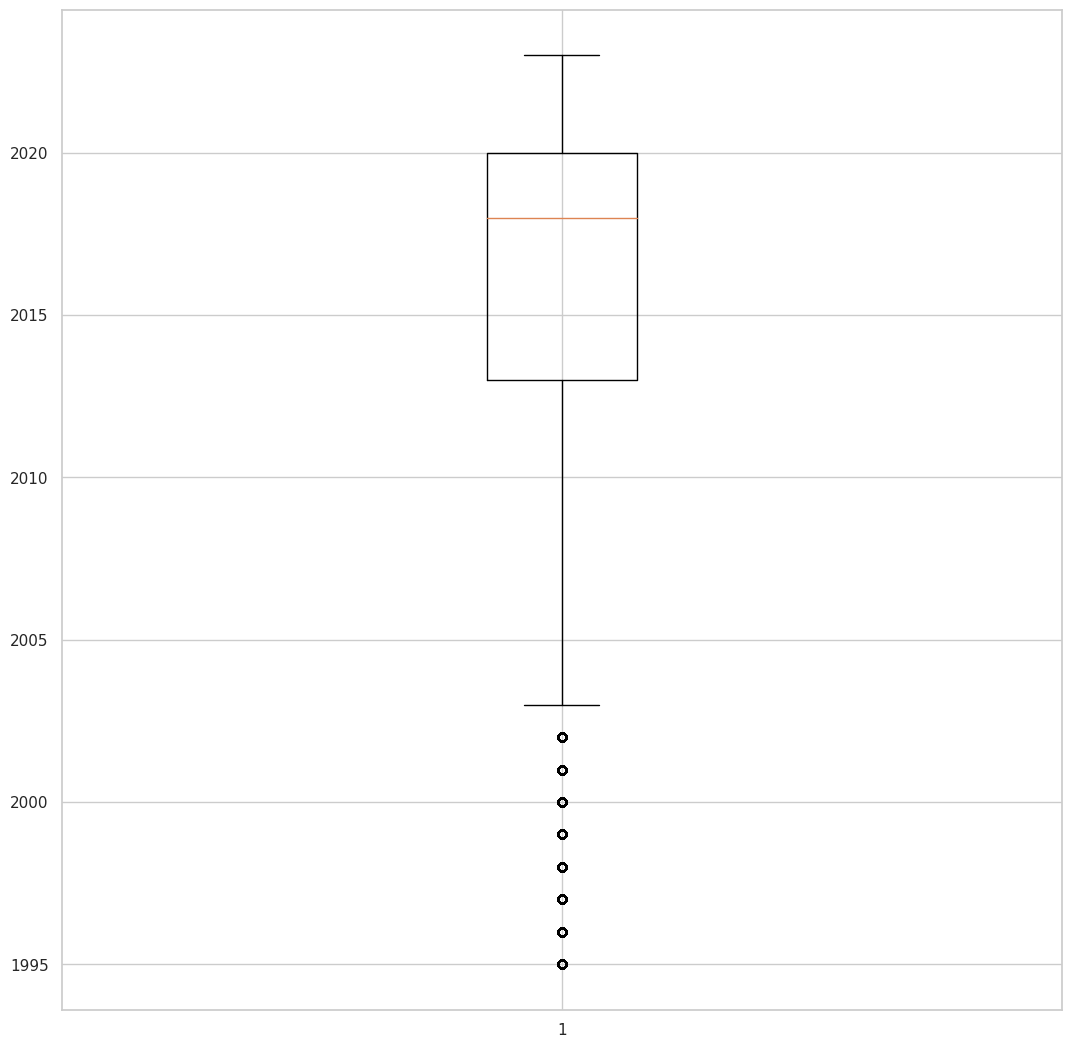

In [432]:

# Assuming droped_df is your DataFrame
droped_df['year'] = pd.to_numeric(droped_df['year'], errors='coerce')  # Convert to numeric, coerce errors to NaN

fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_axes([0, 0, 1, 1])

# Use dropna to remove NaN values
bp2 = ax2.boxplot(droped_df['year'].dropna())
plt.show()


In [433]:
# Remove outliers for year
Q1 = droped_df['year'].quantile(0.25)
Q3 = droped_df['year'].quantile(0.75)
IQR = Q3 - Q1
filter_mask = (droped_df['year'] >= Q1 - 1.5*IQR) & (droped_df['year'] <= Q3 + 1.5*IQR)
outliersToBeDropped =droped_df.shape[0] - droped_df.loc[filter_mask].shape[0]
print(f'we will drop {outliersToBeDropped} rows')
droped_df = droped_df.loc[filter_mask]

we will drop 5710 rows


Remove outliers from price_in_euro

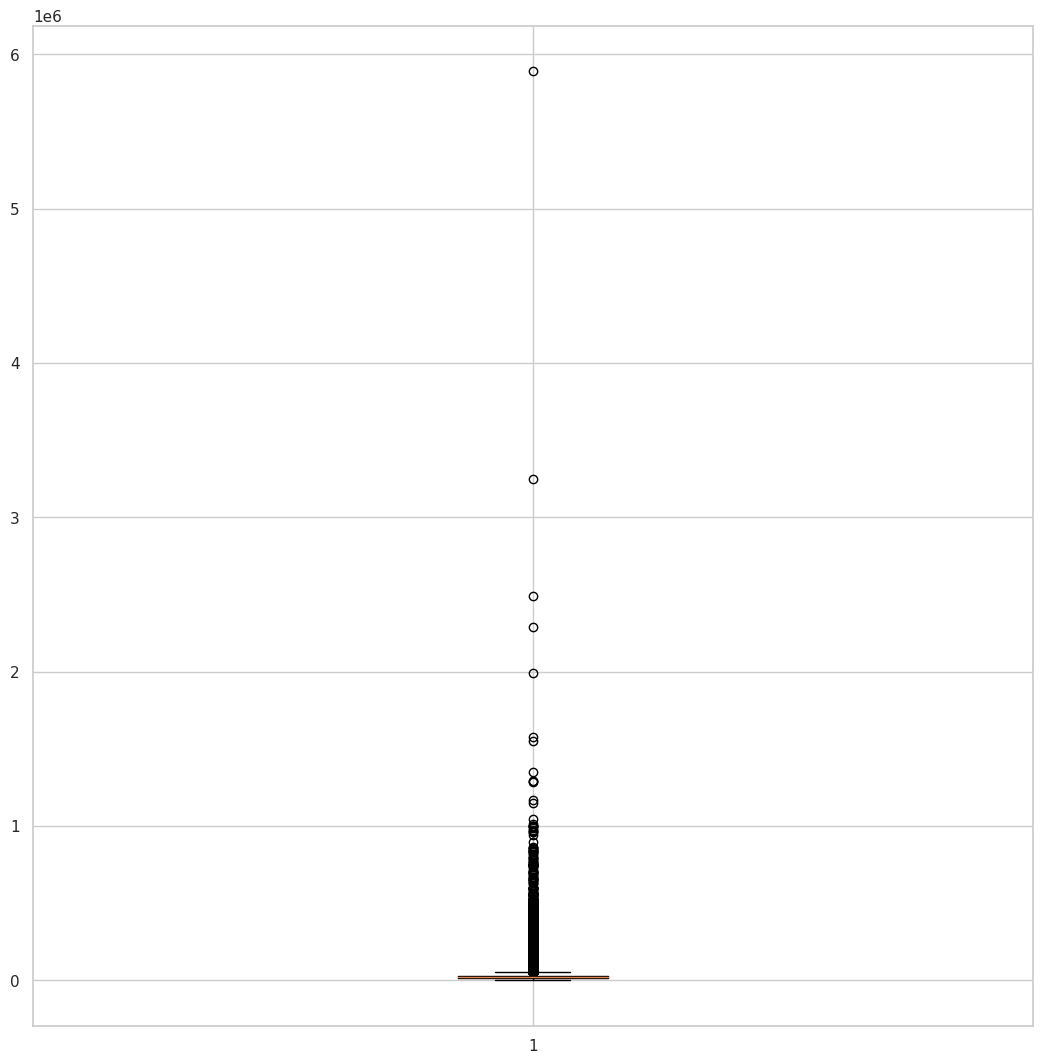

In [434]:
# Boxplot before removing outliers for price_in_euro
droped_df = droped_df.sort_values(by=['price_in_euro']) #sort the price_in_euro  column
fig3 = plt.figure(figsize=(10,10))
ax3 = fig3.add_axes([0,0,1,1])
bp3 = ax3.boxplot(droped_df['price_in_euro'])

In [435]:
# Remove outliers for price_in_euro
Q1 = droped_df['price_in_euro'].quantile(0.25)
Q3 = droped_df['price_in_euro'].quantile(0.75)
IQR = Q3 - Q1
filter_mask = (droped_df['price_in_euro'] >= Q1 - 1.5*IQR) & (droped_df['price_in_euro'] <= Q3 + 1.5*IQR)
outliersToBeDropped =droped_df.shape[0] - droped_df.loc[filter_mask].shape[0]
print(f'we will drop {outliersToBeDropped} rows')
droped_df = droped_df.loc[filter_mask]

we will drop 15740 rows


Remove outliers for power_ps

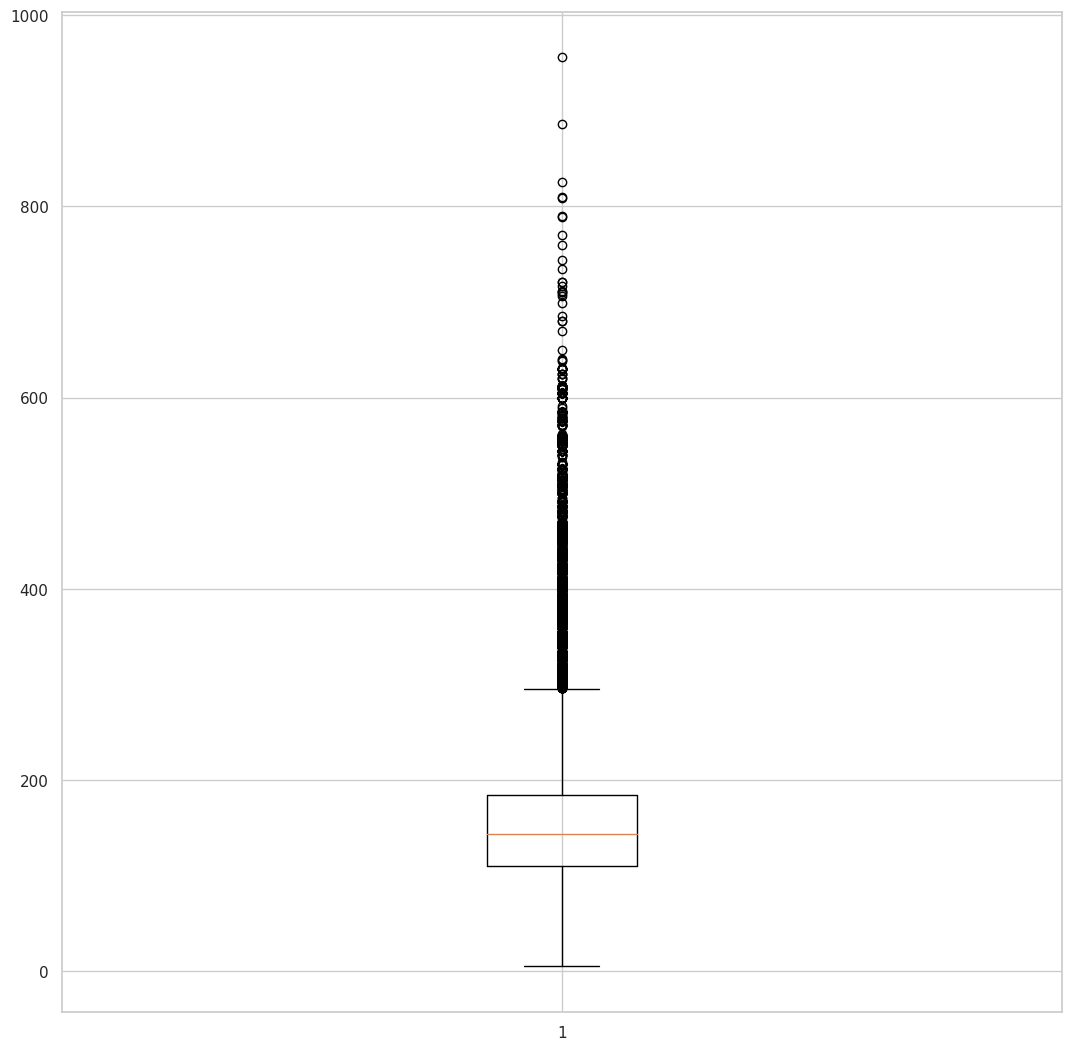

In [436]:
# Boxplot before removing outliers for power_ps
droped_df = droped_df.sort_values(by=['power_ps']) #sort the power_ps column
fig4 = plt.figure(figsize=(10,10))
ax4 = fig4.add_axes([0,0,1,1])
bp4 = ax4.boxplot(droped_df['power_ps'])

In [437]:
# Remove outliers for power_ps
Q1 = droped_df['power_ps'].quantile(0.25)
Q3 = droped_df['power_ps'].quantile(0.75)
IQR = Q3 - Q1
filter_mask = (droped_df['power_ps'] >= Q1 - 1.5*IQR) & (droped_df['power_ps'] <= Q3 + 1.5*IQR)
outliersToBeDropped =droped_df.shape[0] - droped_df.loc[filter_mask].shape[0]
print(f'we will drop {outliersToBeDropped} rows')
droped_df = droped_df.loc[filter_mask]

we will drop 12164 rows


Remove outliers for Mileage_km.

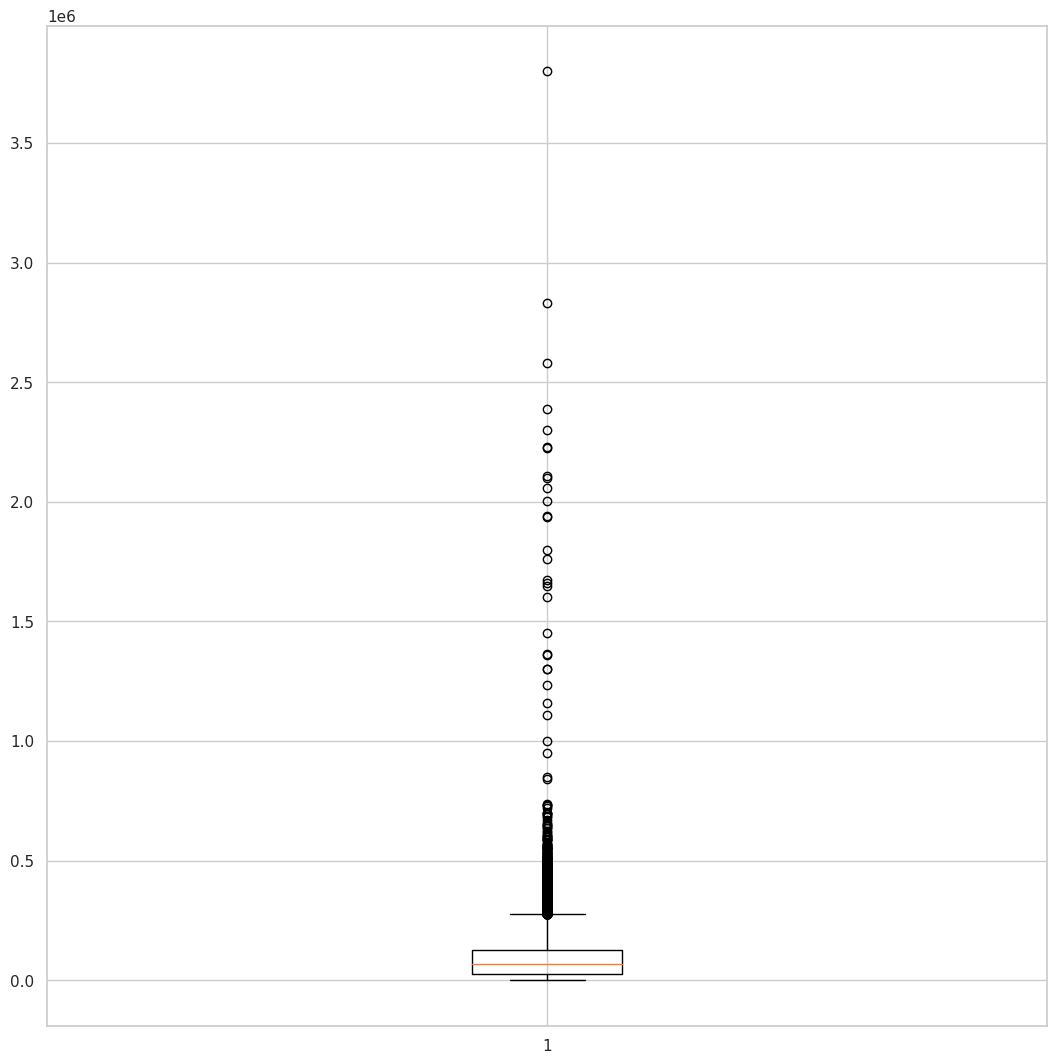

In [438]:
# Boxplot before removing outliers
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(droped_df['mileage_in_km'])

In [439]:
# Remove outliers for mileage_in_km
Q1 = droped_df['mileage_in_km'].quantile(0.25)
Q3 = droped_df['mileage_in_km'].quantile(0.75)
IQR = Q3 - Q1
filter_mask = (droped_df['mileage_in_km'] >= Q1 - 1.5*IQR) & (droped_df['mileage_in_km'] <= Q3 + 1.5*IQR)
outliersToBeDropped =droped_df.shape[0] - droped_df.loc[filter_mask].shape[0]
print(f'we will drop {outliersToBeDropped} rows')
droped_df = droped_df.loc[filter_mask]

we will drop 4504 rows


In [440]:
# Number of rows and columns
print("Number of rows and columns:", df.shape)

Number of rows and columns: (250873, 13)


# 4- Duplicates

In [441]:
# Display the total number of rows before removing duplicates
total_rows_before = df.shape[0]
print(f"\nTotal number of rows before removing duplicates: {total_rows_before}")

# Drop duplicate rows
df_no_duplicates = df.drop_duplicates()

# Display the total number of rows after removing duplicates
total_rows_after = df_no_duplicates.shape[0]
print(f"\nTotal number of rows after removing duplicates: {total_rows_after}")


Total number of rows before removing duplicates: 250873

Total number of rows after removing duplicates: 244537


# 4- Visuals for the reaserch questions

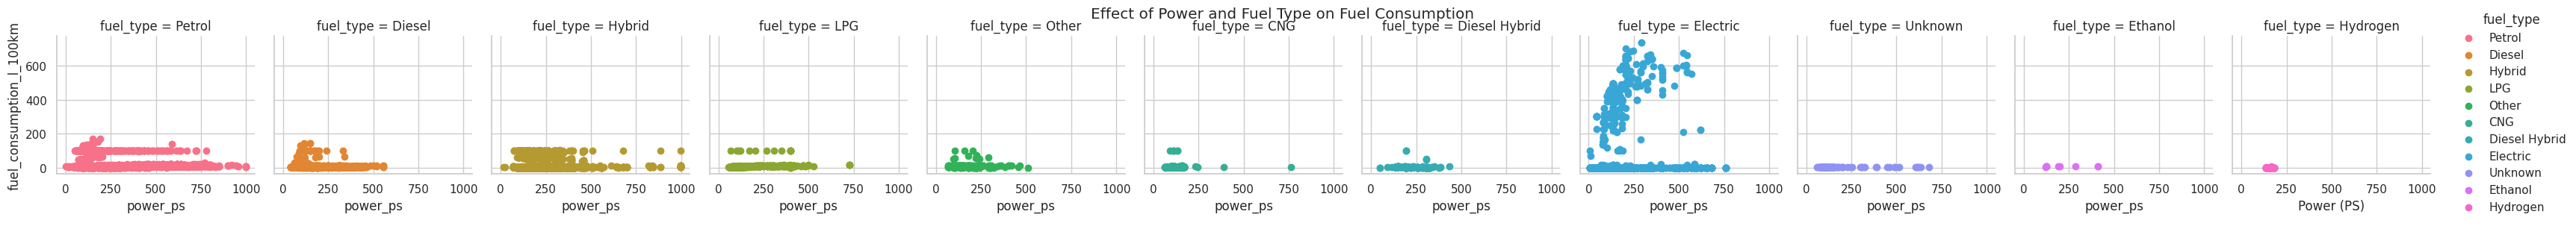

In [442]:
# Scatter plot for each fuel type
g = sns.FacetGrid(df, col='fuel_type', hue='fuel_type')
g.map(plt.scatter, 'power_ps', 'fuel_consumption_l_100km')
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Effect of Power and Fuel Type on Fuel Consumption')
plt.xlabel('Power (PS)')
plt.ylabel('Fuel Consumption (L/100km)')
plt.show()


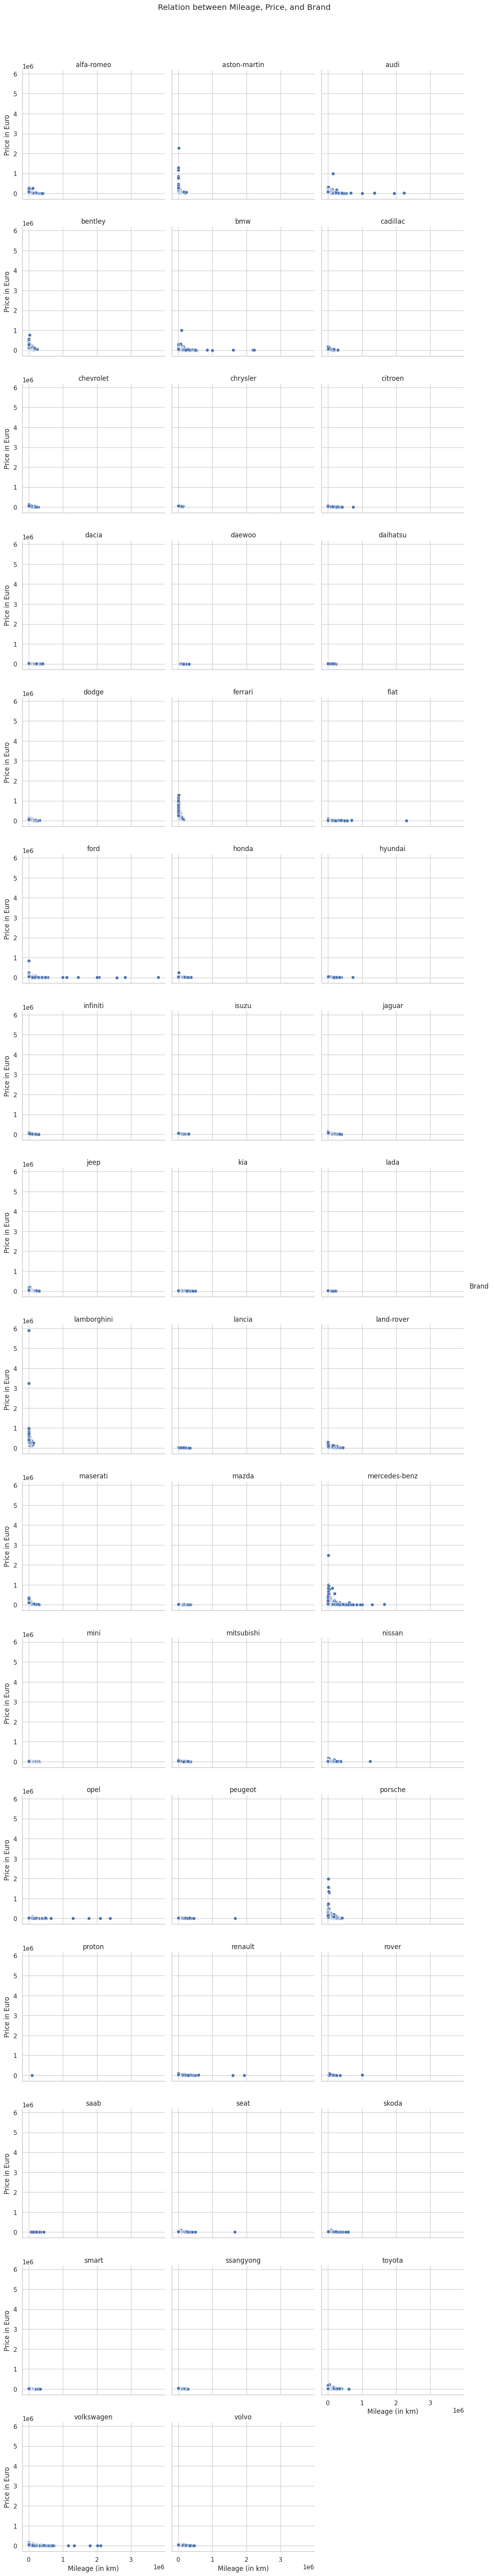

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns mileage_in_km, price_in_euro, and brand

# Create a FacetGrid with a scatter plot for each brand
g = sns.FacetGrid(df, col='brand', col_wrap=3, height=4)
g.map(sns.scatterplot, 'mileage_in_km', 'price_in_euro')

# Set titles and labels
g.set_axis_labels('Mileage (in km)', 'Price in Euro')
g.set_titles(col_template="{col_name}")
g.add_legend(title='Brand')

plt.suptitle('Relation between Mileage, Price, and Brand', y=1.02)
plt.show()

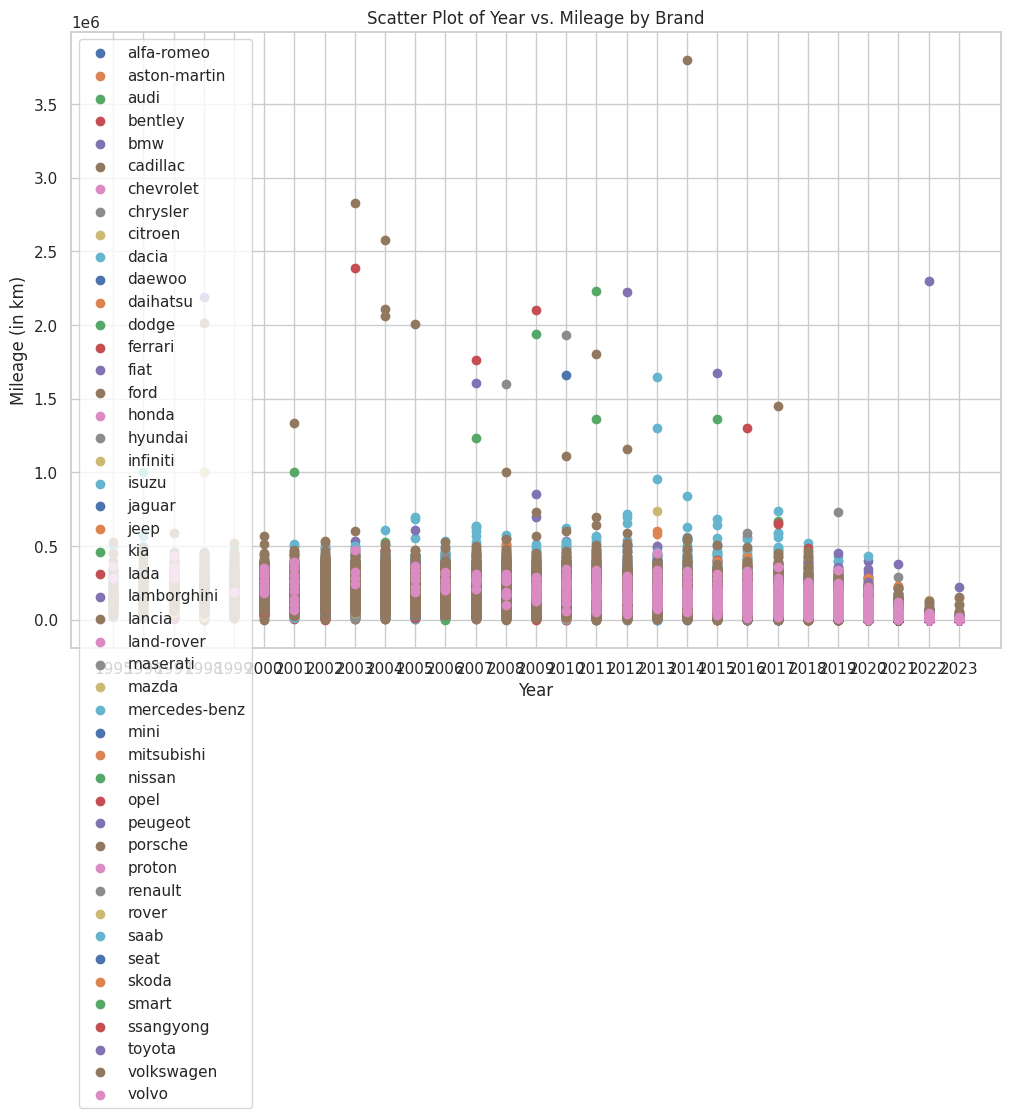

In [444]:
import pandas as pd
import matplotlib.pyplot as plt


# Scatter plot
plt.figure(figsize=(12, 8))

# Plotting each brand separately
brands = df['brand'].unique()
for brand in brands:
    brand_data = df[df['brand'] == brand]
    plt.scatter(brand_data['year'], brand_data['mileage_in_km'], label=brand)

plt.title('Scatter Plot of Year vs. Mileage by Brand')
plt.xlabel('Year')
plt.ylabel('Mileage (in km)')
plt.legend()
plt.grid(True)
plt.show()
